# Câu 1: 
- Cho tập tin iris.csv, đọc dữ liệu dataframe và chỉ lấy 4 cột.
- Từ dataframe, sử dụng SVD bằng công thức để giảm chiều dữ liệu chỉ có 2 component
- Trực quan hóa dữ liệu sau khi giảm chiều, có cả cột species

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_excel("Data/Iris.xls")
iris.info

<bound method DataFrame.info of      sepallength  sepalwidth  petallength  petalwidth            iris
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
5            5.4         3.9          1.7         0.4     Iris-setosa
6            4.6         3.4          1.4         0.3     Iris-setosa
7            5.0         3.4          1.5         0.2     Iris-setosa
8            4.4         2.9          1.4         0.2     Iris-setosa
9            4.9         3.1          1.5         0.1     Iris-setosa
10           5.4         3.7          1.5         0.2     Iris-setosa
11           4.8         3.4          1.6         0.2     Iris-setosa
12           4.8         3.0          1.4         0.1     

In [3]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = iris[['sepallength', 'sepalwidth','petallength', 'petalwidth']]
X.tail()

,sepallength,sepalwidth,petallength,petalwidth
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
#SVD
U, s, VT = np.linalg.svd(X)

In [6]:
U

array([[-6.16171172e-02,  1.29969428e-01, -5.58364155e-05, ...,
        -9.34637342e-02, -9.60224157e-02, -8.09922905e-02],
       [-5.80722977e-02,  1.11371452e-01,  6.84386629e-02, ...,
         3.66755322e-02, -3.24463474e-02,  1.27273399e-02],
       [-5.67633852e-02,  1.18294769e-01,  2.31062793e-03, ...,
         3.08252776e-02,  1.95234663e-01,  1.35567696e-01],
       ...,
       [-9.40702260e-02, -4.98348018e-02, -4.14958083e-02, ...,
         9.81822841e-01, -2.17978813e-02, -8.85972146e-03],
       [-9.48993908e-02, -5.62107520e-02, -2.12386574e-01, ...,
        -2.14264126e-02,  9.42038920e-01, -2.96933496e-02],
       [-8.84882764e-02, -5.16210172e-02, -9.51442925e-02, ...,
        -8.52768485e-03, -3.02139863e-02,  9.73577349e-01]])

In [7]:
s

array([95.95066751, 17.72295328,  3.46929666,  1.87891236])

In [8]:
VT

array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
       [ 0.28583096,  0.54488976, -0.70889874, -0.34475845],
       [ 0.49942378, -0.67502499, -0.05471983, -0.54029889],
       [ 0.32345496, -0.32124324, -0.48077482,  0.74902286]])

In [9]:
VT

array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
       [ 0.28583096,  0.54488976, -0.70889874, -0.34475845],
       [ 0.49942378, -0.67502499, -0.05471983, -0.54029889],
       [ 0.32345496, -0.32124324, -0.48077482,  0.74902286]])

In [10]:
sigma = np.zeros(X.shape)
sigma[: X.shape[1], :X.shape[1]] = np.diag(s)
sigma[0:5]

array([[95.95066751,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.72295328,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46929666,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.87891236],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [11]:
n_components = 2
sigma = sigma[:, :n_components]
VT = VT[: n_components, :]

In [12]:
VT

array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
       [ 0.28583096,  0.54488976, -0.70889874, -0.34475845]])

In [13]:
# Solution 1
T_s1 = U.dot(sigma)
T_s1[0:5]

array([[-5.91220352,  2.30344211],
       [-5.57207573,  1.97383104],
       [-5.4464847 ,  2.09653267],
       [-5.43601924,  1.87168085],
       [-5.87506555,  2.32934799]])

In [14]:
T_s2 = X.dot(VT.T)
T_s2[:5]

,0,1
0,-5.912204,2.303442
1,-5.572076,1.973831
2,-5.446485,2.096533
3,-5.436019,1.871681
4,-5.875066,2.329348


In [15]:
T_s2.columns = ['comp1', 'comp2']

In [16]:
T_s2['species'] = iris['iris']
T_s2.head()

,comp1,comp2,species
0,-5.912204,2.303442,Iris-setosa
1,-5.572076,1.973831,Iris-setosa
2,-5.446485,2.096533,Iris-setosa
3,-5.436019,1.871681,Iris-setosa
4,-5.875066,2.329348,Iris-setosa


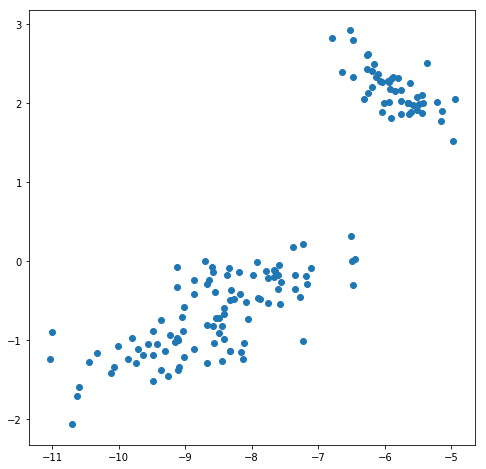

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(T_s2['comp1'], T_s2['comp2'])
plt.show()

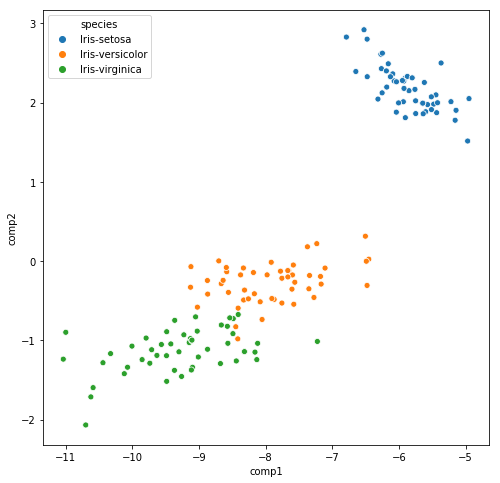

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = "comp1", y="comp2", data = T_s2, hue='species')
plt.show()

# Câu 2:
- Tải dữ liệu digits từ dataset của sklearn
- Từ dữ liệu sử dụng TrancatedSVD để giảm chiều dữ liệu chỉ còn 10 component.
- Trực quan hóa dữ liệu sau khi giảm chiều??


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

In [20]:
# load the data
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [21]:
digits.data.shape

(1797, 64)

In [22]:
#Standardize the feature matrix
X = digits.data
#Make sparse matrix
X_sparse = csr_matrix(X)
X_sparse.shape

(1797, 64)

In [23]:
X_sparse

<1797x64 sparse matrix of type '<class 'numpy.float64'>'
	with 58736 stored elements in Compressed Sparse Row format>

In [24]:
#create a TSVD
tsvd = TruncatedSVD(n_components = 10)

In [25]:
#Conduct TSVD on sparse matrix
X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)

In [26]:
#show results
print('Original number of features:', X_sparse.shape[1])
print('Reduced number of features: ', X_sparse_tsvd.shape[1])

Original number of features: 64
Reduced number of features:  10


In [27]:
X_sparse_tsvd[0:5]

array([[ 45.86127719,  -1.1921157 ,  21.10005912,  -9.48896842,
         13.043128  ,  -7.01640711,  -8.96006944,   0.39653017,
          1.30933314,  -1.39058841],
       [ 55.52967927,   7.86177   , -20.487199  ,   4.25039389,
        -14.66952806,   6.09256092,  -6.11566062,   1.5375038 ,
         -4.73938558,   3.40747619],
       [ 55.8278837 ,   6.91459569,  -9.66245214,   2.63356283,
        -11.92228052, -17.91843804,  -4.16670766,   2.29738864,
        -16.83800503,  -1.11879234],
       [ 45.13574478, -15.88911188,   3.33812498,   9.94973969,
        -12.69585836,   6.67076242,  -0.91187079,  -3.65776543,
          9.24666878,  -4.03560066],
       [ 40.74225609,  23.36790152,   3.92625219,  -5.32996477,
        -14.39644304,  -0.70392437,  -6.46797061,  -6.02791081,
          9.34476769,  -6.13804815]])

In [28]:
#View percent of variance explained by new features
#Sum of 10 components' explained variance ratios

In [30]:
tsvd.explained_variance_ratio_[0:10].sum()

0.7324265034417949

### 73% with 10 columns

In [ ]:
X_sparse_tsvd.size

In [35]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [31]:
# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [32]:
tsvd_var_ratios

array([0.02870851, 0.1489005 , 0.13605748, 0.11771282, 0.0838876 ,
       0.0577855 , 0.04752737, 0.04225609, 0.03619554, 0.03339511])

In [36]:
# Run function
select_n_components(tsvd_var_ratios, 0.95)

10